In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gateway.xlsx to Gateway.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Gateway.xlsx']))

In [ ]:
df

,N1,N2
0,1,3
1,1,2
2,2,3
3,3,5
4,4,5
5,5,6
6,5,9
7,6,7
8,8,7
9,7,10


In [ ]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'N1', 'N2')

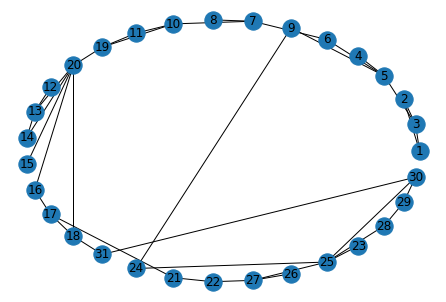

In [ ]:
nx.draw_circular(G,with_labels=True)
plt.show()

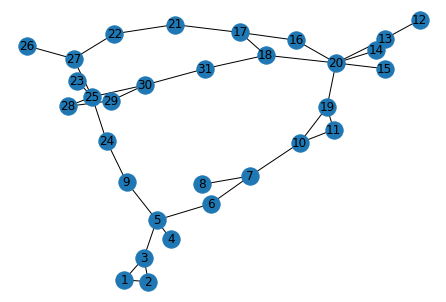

In [ ]:
nx.draw(G,with_labels=True)
plt.show()


## Now Applying Node2Vec

In [ ]:
!pip install node2vec

In [ ]:
import node2vec

In [ ]:
node2vec_used = node2vec.Node2Vec(G, dimensions=64, walk_length=10, num_walks=200, workers=4)

Computing transition probabilities: 100%|██████████| 31/31 [00:00<00:00, 2785.66it/s]


In [ ]:
model = node2vec_used.fit(window=10, min_count=1, batch_words=4)

In [ ]:
print(model.wv.vocab)

{'26': <gensim.models.keyedvectors.Vocab object at 0x7f43d3d3eba8>, '27': <gensim.models.keyedvectors.Vocab object at 0x7f43d3d3ec18>, '25': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139ba8>, '30': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139c50>, '29': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139c88>, '31': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139cc0>, '19': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139cf8>, '10': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139d30>, '7': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139d68>, '11': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139da0>, '20': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139dd8>, '16': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139e10>, '12': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139e48>, '13': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139e80>, '6': <gensim.models.keyedvectors.Vocab object at 0x7f43b3139eb

In [ ]:
model.wv.save_word2vec_format("Gateway_embedding.csv")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
df_emb = pd.read_csv("Gateway_embedding.csv")

In [ ]:
df_emb.head()

,31 64
0,20 0.14093995 -0.2362313 0.24218573 0.6649132 ...
1,25 0.7926519 0.43482155 0.303359 -0.20123112 -...
2,5 0.9362466 0.091549605 -0.7757697 -0.4311735 ...
3,27 0.9734622 0.32044435 -0.0064412155 0.468681...
4,7 0.602865 -0.09939467 -1.102479 -0.13678691 0...


In [ ]:
df_emb.describe

<bound method NDFrame.describe of                                                 31 64
0   20 0.14093995 -0.2362313 0.24218573 0.6649132 ...
1   25 0.7926519 0.43482155 0.303359 -0.20123112 -...
2   5 0.9362466 0.091549605 -0.7757697 -0.4311735 ...
3   27 0.9734622 0.32044435 -0.0064412155 0.468681...
4   7 0.602865 -0.09939467 -1.102479 -0.13678691 0...
5   3 1.1876491 -0.24416359 -0.45648748 -0.1239080...
6   13 -0.013911418 -0.41856566 0.6543326 0.708104...
7   10 0.4003083 -0.20177126 -0.86364967 0.0363676...
8   30 0.38672486 0.39826873 0.69498336 -0.1581312...
9   17 0.5555827 -0.0033700701 0.34954908 1.000620...
10  19 0.25808752 -0.24046555 -0.54482156 0.265640...
11  18 0.27302152 0.11490278 0.59985125 0.48475343...
12  9 0.78365564 0.3016377 -0.39880964 -0.44243893...
13  6 0.6775111 0.0006152951 -0.9825177 -0.2774508...
14  24 0.77919394 0.43091947 -0.18922065 -0.457200...
15  1 1.3060126 -0.34533027 -0.3216838 0.022468887...
16  2 1.2767348 -0.33839685 -0.28187215 0.029268

In [ ]:
print(df_emb.iloc[1,:])

31 64    25 0.7926519 0.43482155 0.303359 -0.20123112 -...
Name: 1, dtype: object


In [ ]:
#df_nodes = df_emb.iloc[:,0]
#print(df_nodes.head)
print(type(df_emb.iloc[1])) 

<class 'pandas.core.series.Series'>


In [ ]:
model.wv.most_similar(positive=['20', '31'], negative=['25'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('15', 0.924863338470459),
 ('14', 0.8659040927886963),
 ('13', 0.8169666528701782),
 ('16', 0.7749278545379639),
 ('18', 0.7458052635192871),
 ('12', 0.7401757836341858),
 ('19', 0.7012749314308167),
 ('11', 0.641926646232605),
 ('17', 0.6120761036872864),
 ('10', 0.49045947194099426)]